<a href="https://colab.research.google.com/github/Hossein97Py/Coursera_Course2/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1401-07-22

هفته دوم کورس دوم دوره کورسرا مربوط به ترین کردن یک شبکه عصبی هست. همچنین اکتیویشین فانکشن های دیگه و دسته بندی با بیشتر از دو دسته

اول که مدل رو میساختیم یعنی اینجا در واقع بهش میگیم چجوری محاسبات رو انجام بده

import tensorflow as tf

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense

  model = Sequential ([

    Dense(units=25, activation='sigmoid'),
    Dense(units=15, activation='sigmoid'),
    Dense(units=1, activation='sigmoid'),
  ])

خوب حالا کار بعدی اینه که از تنسورفلو بخواهیم مدل رو کامپایل کنه. که اینجا قدم مهم اینه که لاس فانکشن رو مشخص کنیم

from tensorflow.keras.losses import BinaryCrossEntropy

 model.compile(loss=BinaryCrossEntropy())

 اینجا چون دسته بندی مون دو تایی بود (مساله طبقه بندی تصویر اعداد صفر و یک دست نویس) از این لاس فانکشن استفاده کردیم. مثلا اگه مساله رگرسیون بود از لاس فانکشن مین اسکوئر ارور استفاده میکردیم
 
 حالا هم مدل رو فیت میکنیم

 model.fit(X, Y, epochs=100)

 اون صد در واقع تعداد قدم های گرادیان دیسنت هست

تو گرادیان دیسنت یکسری ترم های معادلات دیفرانسیل جزئی داشتیم dj-dw, dj-db

که برای محاسبه اینها از بک پراپگیشن استفاده میشه


میتونیم اکتیویشن فانکشن ها رو هم تغییر بدیم

اکتیویشن فانکشن سیگموید یک حالت باینری داره. ایکس از یه مقداری که بیشتر بشه جواب این تابع میشه یک. در کل هم جوابش بین صفر و یک هست. حالا اگر بخواهیم حالات بیشتری رو مدنظر داشته باشیم از ReLU استفاده میکنیم

Rectified Linear Unit

این تابع برای ایکس های کمتر از صفر برابر صفر هست و برای ایکس های بیشتر از صفر برابر ایکس. یک اکتیویشن فانکشن دیگه هم هست که البته گاها عنوان میشه اگه از این استفاده کنیم انگار از هیچ اکتیویشن فانکشنی استفاده نکردیم

Linear Activation Function: g(z) = z



برای هر لایه (چه لایه خروجی و چه هر لایه پنهان) میشه یک اکتیویشن فانکشن مشخص کرد. انتخاب تابع فعالسازی برای لایه خروجی راحت تر هست چرا که به راحتی با توجه به خروجی شبکه مصنوعی میتونیم تصمیم بگیریم. مثلا اگر کلاسیفیکشن دوتایی باشه سیگموید بهترین گزینه هستش. برای رگرسیونی که اعداد مثبت و منفی میتونه باشه از تابع فعالسازی خطی استفاده میشه و اگر خروجی فقط اعداد مثبت باشه بهترین انتخاب تابع فعالسازی ReLU هست

برای لایه های مخفی به طور معمول هز ReLU استفاده میشه. به طور کلی ما از این زیاد استفاده میکنیم مگر مثلا برای لایه خروجی مساله باینری کلاسیفیکیشن

چرا که سیگموئید در دو قسمت ابتدایی و انتهایی فلت میشه ولی رلیو فقط در قسمت ابتدایی اش فلت هست. و چون از گرادیان کاهشی برای مدلها استفاده میشه فانکشنی که دو تا قسمت فلت داشته باشه باعث کند شدن گرادیان کاهشی میشه

اساسا قدرت شبکه هوش مصنوعی از تابع فعالسازی میاد یعنی اگه از تابع فعالسازی استفاده نکنیم یا از تابع فعالسازی خطی استفاده کنیم کارمون میشه همون رگرسیون خطیو نمیتونیم مسائل پیچیده تر رو حل کنیم و هرچی هم لایه ها رو بیشتر کنیم بهبودی حاصل نمیشه

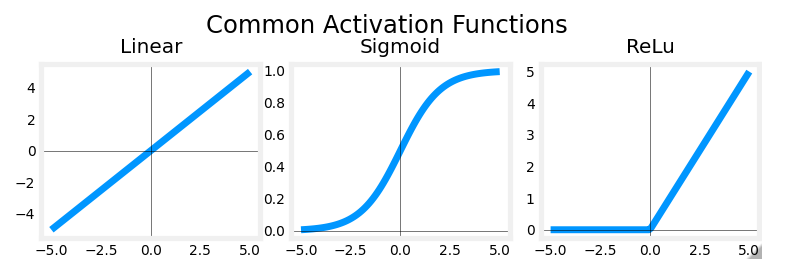

# Multiclass classification

The softmax regression algorithm is a generalization of logistic regression, which is a binary classification algorithm to the multiclass classification contexts

اگر یک مدلی بخواهیم توسعه بدیم که تمام اعداد دست نویس رو بتونه تشخیص بده میشه مدل دسته بندی که خروجی اش میتونه 10 حالت مختلف داشته باشه. در معماری این مدل لایه خروجی 10 تا نورون داره و همچنین لایه خروجی اش رو بهش میگیم لایه سافت مکس یا لایه خروجی سافت مکس در ادامه کدنویسی این مدل ارائه میشه

In [ ]:
# 1- Specify the model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential ([

    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='sofrmax'),
                    ])

In [ ]:
# 2- Specify loss and cost
from tensorflow.keras.losses import SparseCategoricalCrossEntropy
model.complie (loss=SparseCategoricalCrossEntropy())

In [ ]:
# 3- Train on data
model.fit(X, Y, epochs=100)

در واقع این کد کار میکنه ولی بهتره به صورت زیر باشه

In [ ]:
model = Sequential ([

    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear'),  # اینو از تابع فعالسازی خطی استفاده کردیم
                    ])

model.complie (loss=SparseCategoricalCrossEntropy(from_logits=True)) # اینجا هم این آرگومان رو اضافه کردیم

هدف از تغییرات ایجاد شده کاهش خطاهای ناشی از گرد کردن اعداد حین تقسیم و به توان رساندن است

بعد برای استفاده از این مدل باید اینجوری اقدام کنیم


In [ ]:
model.fit(X, Y, epochs=100)
logits = model(X)
f_x = tf.nn.softmax(logits)